<a href="https://colab.research.google.com/github/JVMergulho/foto_comp/blob/main/fotografia_computacional/Avalia%C3%A7%C3%A3oV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

##Separação de canais RGB e CMY

In [ ]:
def rgb2cmy(img):

  c = 255 - img[:,:,0]
  m = 255 - img[:,:,1]
  y = 255 - img[:,:,2]

  return np.stack((c,m,y), axis=-1)

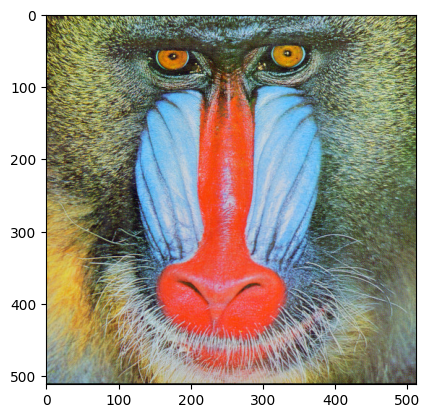

In [ ]:
baboon_bgr = cv2.imread('images/baboon.jpg')
baboon = cv2.cvtColor(baboon_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(baboon)
plt.show()

In [ ]:
r = baboon[:, :, 0]
g = baboon[:, :, 1]
b = baboon[:, :, 2]

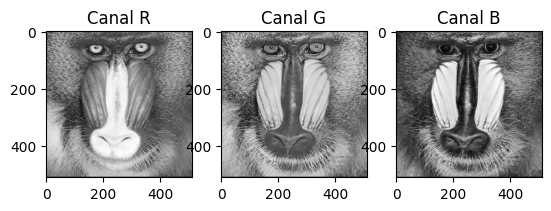

In [ ]:
baboon_cmy = rgb2cmy(baboon)

plt.subplot(1, 3, 1), plt.imshow(r, cmap='gray'), plt.title('Canal R')
plt.subplot(1, 3, 2), plt.imshow(g, cmap='gray'), plt.title('Canal G')
plt.subplot(1, 3, 3), plt.imshow(b, cmap='gray'), plt.title('Canal B')
plt.show()

In [ ]:
baboon_cmy = rgb2cmy(baboon)

c = baboon_cmy[:,:,0]
m = baboon_cmy[:,:,1]
y = baboon_cmy[:,:,2]

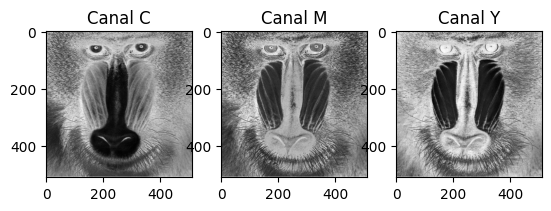

In [ ]:
baboon_cmy = rgb2cmy(baboon)

plt.subplot(1, 3, 1), plt.imshow(c, cmap='gray'), plt.title('Canal C')
plt.subplot(1, 3, 2), plt.imshow(m, cmap='gray'), plt.title('Canal M')
plt.subplot(1, 3, 3), plt.imshow(y, cmap='gray'), plt.title('Canal Y')
plt.show()

In [ ]:
def channel_mean(ch, img):
  for idx in range(len(ch)):
    print(f'mean of {ch[idx]} = {np.mean(img[:,:,idx])}')

In [ ]:
channel_mean(('r','g','b'), baboon)
print('')
channel_mean(('c','m','y'), baboon_cmy)

mean of r = 137.38924407958984
mean of g = 128.86616134643555
mean of b = 113.12966918945312

mean of c = 117.61075592041016
mean of m = 126.13383865356445
mean of y = 141.87033081054688


##Segmentação por cor

In [ ]:
dist = np.linalg.norm(np.array([100,100,100]))
print(dist)

173.20508075688772


In [ ]:
def color_segmentation(orig, dist, img):
  img_seg = np.copy(img)
  h, w, c = img_seg.shape

  dists = np.array([])

  for x in range(h):
    for y in range(w):

      col = img_seg[x,y]
      dist_calc = math.sqrt((col[0] - orig[0])**2 + (col[1] - orig[1])**2  + (col[2] - orig[2])**2)

      if dist_calc >= dist:
        img_seg[x,y] = [0,0,0]
      else:
        dists = np.append(dists, dist_calc)

  if len(dists) > 0:
    mean_dist = np.mean(dists)
  else:
    mean_dist = -1

  # retorna a distância média dentro da região limiar e a nova imagem
  return mean_dist, img_seg

In [ ]:
eagle_bgr = cv2.imread('images/bald_eagle_portrait.jpg')
eagle = cv2.cvtColor(eagle_bgr, cv2.COLOR_BGR2RGB)

mean_dist, eagle_seg = color_segmentation([255,255,0], dist, eagle)

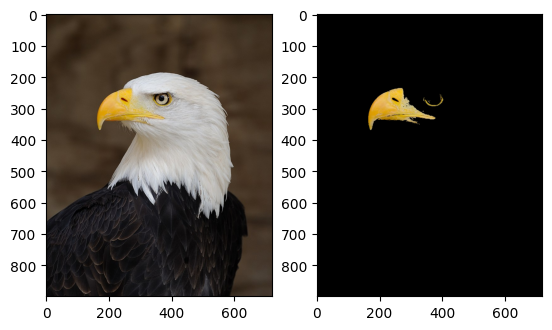

In [ ]:
plt.subplot(1,2,1), plt.imshow(eagle)
plt.subplot(1,2,2), plt.imshow(eagle_seg)
plt.show()

In [ ]:
print(mean_dist)

123.38045956921472


##Limiarização

In [ ]:
moon_bgr = cv2.imread('images/moon.jpg')
sum_channels = np.sum(moon_bgr, axis=2)

normalizar = lambda v: (255*(v- v.min())/(v.max() - v.min())).astype(int)

moon = normalizar(sum_channels)/255

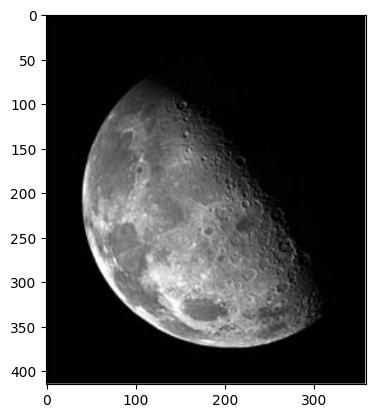

In [ ]:
plt.imshow(moon, cmap='gray')
plt.show()

In [ ]:
limiarizar = np.vectorize(lambda x: 0 if x < 0.25 else (0.25 if x < 0.5 else (0.5 if x < 0.75 else x)))

In [ ]:
moon_lim = limiarizar(moon)

print(np.mean(moon_lim))

0.12666750896754314


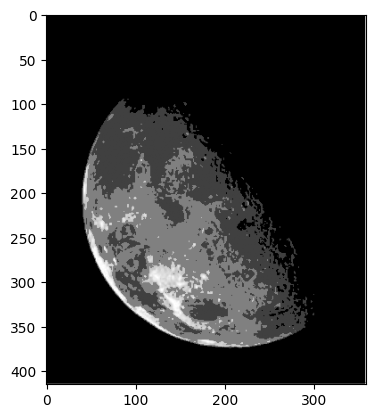

In [ ]:
plt.imshow(moon_lim, cmap='gray')
plt.show()